In [7]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import json
import shutil

from PIL import Image

In [8]:
datapath = '../data/'
valpath = datapath + 'val_pics/'
annotations = datapath + 'annotations/'


imgs = []

with open(annotations + 'filename_label.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        imgs.append(valpath + row[0])
        print(valpath + row[0])

imgs = imgs[1:]

../data/val_pics/file_name
../data/val_pics/ILSVRC2012_val_00000293.JPEG
../data/val_pics/ILSVRC2012_val_00002138.JPEG
../data/val_pics/ILSVRC2012_val_00003014.JPEG
../data/val_pics/ILSVRC2012_val_00006697.JPEG
../data/val_pics/ILSVRC2012_val_00007197.JPEG
../data/val_pics/ILSVRC2012_val_00009111.JPEG
../data/val_pics/ILSVRC2012_val_00009191.JPEG
../data/val_pics/ILSVRC2012_val_00009346.JPEG
../data/val_pics/ILSVRC2012_val_00009379.JPEG
../data/val_pics/ILSVRC2012_val_00009396.JPEG
../data/val_pics/ILSVRC2012_val_00010306.JPEG
../data/val_pics/ILSVRC2012_val_00011233.JPEG
../data/val_pics/ILSVRC2012_val_00011993.JPEG
../data/val_pics/ILSVRC2012_val_00012503.JPEG
../data/val_pics/ILSVRC2012_val_00013716.JPEG
../data/val_pics/ILSVRC2012_val_00016018.JPEG
../data/val_pics/ILSVRC2012_val_00017472.JPEG
../data/val_pics/ILSVRC2012_val_00017699.JPEG
../data/val_pics/ILSVRC2012_val_00017700.JPEG
../data/val_pics/ILSVRC2012_val_00017995.JPEG
../data/val_pics/ILSVRC2012_val_00018317.JPEG
../data

In [3]:
Timgs = imgs[:30]

print(len(Timgs))

30


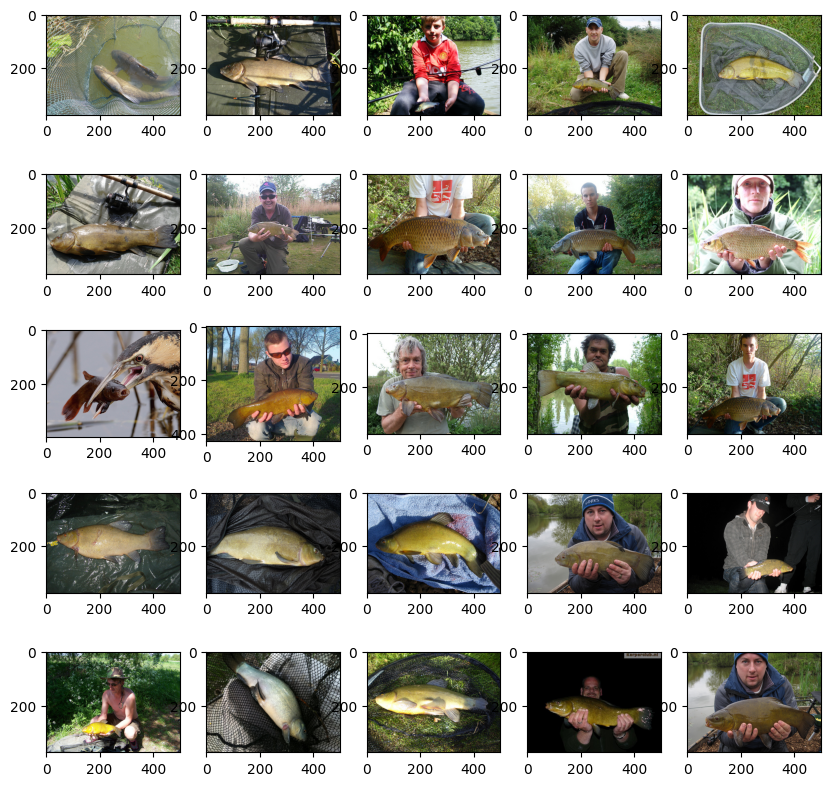

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    im = Image.open(Timgs[i])
    plt.imshow(im)

plt.show()

In [9]:
dfF = pd.read_csv(annotations + 'filename_label.csv')
dfL = pd.read_csv(annotations + 'imagenet_labels.txt', header=None)
LoL = dfL[1].to_numpy()
dfF['str_label'] = dfF['label'].apply(lambda x : LoL[x])
dfF

file_name  label      str_label
0      ILSVRC2012_val_00000293.JPEG      0          tench
1      ILSVRC2012_val_00002138.JPEG      0          tench
2      ILSVRC2012_val_00003014.JPEG      0          tench
3      ILSVRC2012_val_00006697.JPEG      0          tench
4      ILSVRC2012_val_00007197.JPEG      0          tench
...                             ...    ...            ...
49995  ILSVRC2012_val_00044368.JPEG    999  toilet tissue
49996  ILSVRC2012_val_00045266.JPEG    999  toilet tissue
49997  ILSVRC2012_val_00046353.JPEG    999  toilet tissue
49998  ILSVRC2012_val_00047144.JPEG    999  toilet tissue
49999  ILSVRC2012_val_00049174.JPEG    999  toilet tissue

[50000 rows x 3 columns]

In [6]:
dfF[dfF['str_label']=='musteline_mammal']

Empty DataFrame
Columns: [file_name, label, str_label]
Index: []

In [7]:
dfJson = pd.read_json(annotations+'imagenet_x_val_multi_factor.jsonl', lines=True)
dfJson

file_name  class  multiple_objects  background  \
0      ILSVRC2012_val_00004487.JPEG    762                 0           1   
1      ILSVRC2012_val_00003963.JPEG    292                 0           1   
2      ILSVRC2012_val_00041992.JPEG    718                 0           0   
3      ILSVRC2012_val_00028056.JPEG    635                 0           1   
4      ILSVRC2012_val_00016832.JPEG    497                 0           0   
...                             ...    ...               ...         ...   
48863  ILSVRC2012_val_00004973.JPEG    973                 0           1   
48864  ILSVRC2012_val_00038750.JPEG    765                 0           1   
48865  ILSVRC2012_val_00043497.JPEG    409                 0           1   
48866  ILSVRC2012_val_00005859.JPEG    441                 0           1   
48867  ILSVRC2012_val_00005939.JPEG    973                 0           0   

       color  brighter  darker  style  larger  smaller  object_blocking  \
0          0         0       0      0       1        0                0   
1          1         0       0      1       0        0                0   
2          1         0       0      0       0        0                0   
3          0         0       0      0       0        0                0   
4          1         0       1      0       0        0                0   
...      ...       ...     ...    ...     ...      ...              ...   
48863      1         0       0      0       0        0                0   
48864      0         0       0      1       0        0                0   
48865      1         0       0      0       0        0                0   
48866      0         0       0      0       0        0                0   
48867      0         0       0      0       0        0                0   

       person_blocking  partial_view  pattern  pose  shape  subcategory  \
0                    0             0        0     1      0            0   
1                    0             0        0     1      0            0   
2                    0             0        0     1      0            0   
3                    0             0        1     1      1            0   
4                    0             0        0     1      0            0   
...                ...           ...      ...   ...    ...          ...   
48863                0             0        0     1      0            0   
48864                0             0        0     1      0            0   
48865                0             0        0     1      0            0   
48866                0             0        1     1      0            0   
48867                0             0        1     1      1            1   

       texture                                      justification  \
0            0                 close up of a pan fried sea bass.    
1            0                               sepia image of tiger   
2            0                                the bridge is brown   
3            0   the magnetic compass is on the bronze container    
4            0                          A dark image of a church.   
...        ...                                                ...   
48863        0                                 color is different   
48864        0  front view image of rocking chair made by digi...   
48865        0  right angle of analog clock with gold metallic...   
48866        0                A different design of a beer glass.   
48867        0                        a different types of corals   

                 one_word  
0       sea bass close up  
1       digitally altered  
2               rare view  
3              wood shape  
4                    dark  
...                   ...  
48863               color  
48864  window digital art  
48865         right angle  
48866  pattern background  
48867              corals  

[48868 rows x 20 columns]

In [8]:
dfFinal = dfJson.merge(dfF, how='inner', on='file_name').drop(columns=['class'])

In [9]:
dfFinal.to_csv('val_imgs_df.csv', index=False)

In [17]:
df1 = pd.read_csv('val_imgs_df.csv')

In [18]:
df1

file_name  multiple_objects  background  color  \
0      ILSVRC2012_val_00004487.JPEG                 0           1      0   
1      ILSVRC2012_val_00003963.JPEG                 0           1      1   
2      ILSVRC2012_val_00041992.JPEG                 0           0      1   
3      ILSVRC2012_val_00028056.JPEG                 0           1      0   
4      ILSVRC2012_val_00016832.JPEG                 0           0      1   
...                             ...               ...         ...    ...   
48863  ILSVRC2012_val_00004973.JPEG                 0           1      1   
48864  ILSVRC2012_val_00038750.JPEG                 0           1      0   
48865  ILSVRC2012_val_00043497.JPEG                 0           1      1   
48866  ILSVRC2012_val_00005859.JPEG                 0           1      0   
48867  ILSVRC2012_val_00005939.JPEG                 0           0      0   

       brighter  darker  style  larger  smaller  object_blocking  ...  \
0             0       0      0       1        0                0  ...   
1             0       0      1       0        0                0  ...   
2             0       0      0       0        0                0  ...   
3             0       0      0       0        0                0  ...   
4             0       1      0       0        0                0  ...   
...         ...     ...    ...     ...      ...              ...  ...   
48863         0       0      0       0        0                0  ...   
48864         0       0      1       0        0                0  ...   
48865         0       0      0       0        0                0  ...   
48866         0       0      0       0        0                0  ...   
48867         0       0      0       0        0                0  ...   

       partial_view  pattern  pose  shape  subcategory  texture  \
0                 0        0     1      0            0        0   
1                 0        0     1      0            0        0   
2                 0        0     1      0            0        0   
3                 0        1     1      1            0        0   
4                 0        0     1      0            0        0   
...             ...      ...   ...    ...          ...      ...   
48863             0        0     1      0            0        0   
48864             0        0     1      0            0        0   
48865             0        0     1      0            0        0   
48866             0        1     1      0            0        0   
48867             0        1     1      1            1        0   

                                           justification            one_word  \
0                     close up of a pan fried sea bass.    sea bass close up   
1                                   sepia image of tiger   digitally altered   
2                                    the bridge is brown           rare view   
3       the magnetic compass is on the bronze container           wood shape   
4                              A dark image of a church.                dark   
...                                                  ...                 ...   
48863                                 color is different               color   
48864  front view image of rocking chair made by digi...  window digital art   
48865  right angle of analog clock with gold metallic...         right angle   
48866                A different design of a beer glass.  pattern background   
48867                        a different types of corals              corals   

      label         str_label  
0       762        restaurant  
1       292             tiger  
2       718              pier  
3       635  magnetic compass  
4       497            church  
...     ...               ...  
48863   973        coral reef  
48864   765     rocking chair  
48865   409      analog clock  
48866   441        beer glass  
48867   973        coral reef  

[48868 rows x 21 columns]

In [23]:
dfSample = df1.sample(30, random_state=42)

In [24]:
dfSample.to_csv('df_30img_samples.csv', index=False)
dfSample

file_name  multiple_objects  background  color  \
32258  ILSVRC2012_val_00049472.JPEG                 0           1      0   
41698  ILSVRC2012_val_00003768.JPEG                 0           0      0   
48172  ILSVRC2012_val_00041473.JPEG                 0           1      0   
13867  ILSVRC2012_val_00001470.JPEG                 0           1      0   
28143  ILSVRC2012_val_00049179.JPEG                 0           1      0   
41146  ILSVRC2012_val_00023283.JPEG                 0           1      0   
35018  ILSVRC2012_val_00030540.JPEG                 0           1      0   
36065  ILSVRC2012_val_00039246.JPEG                 0           1      0   
18821  ILSVRC2012_val_00015178.JPEG                 0           1      0   
30231  ILSVRC2012_val_00023750.JPEG                 0           1      0   
7258   ILSVRC2012_val_00007306.JPEG                 0           1      1   
48622  ILSVRC2012_val_00014415.JPEG                 0           1      1   
28319  ILSVRC2012_val_00026219.JPEG                 0           1      0   
15364  ILSVRC2012_val_00009634.JPEG                 0           1      0   
18163  ILSVRC2012_val_00036975.JPEG                 0           1      0   
17082  ILSVRC2012_val_00040913.JPEG                 0           1      1   
6936   ILSVRC2012_val_00015410.JPEG                 0           1      0   
34274  ILSVRC2012_val_00040676.JPEG                 0           1      1   
15273  ILSVRC2012_val_00040002.JPEG                 0           1      0   
19365  ILSVRC2012_val_00046002.JPEG                 0           1      1   
37442  ILSVRC2012_val_00041922.JPEG                 0           1      0   
29428  ILSVRC2012_val_00021882.JPEG                 0           1      1   
10151  ILSVRC2012_val_00030117.JPEG                 0           1      0   
42656  ILSVRC2012_val_00021683.JPEG                 0           1      0   
48236  ILSVRC2012_val_00030263.JPEG                 0           1      0   
42837  ILSVRC2012_val_00018867.JPEG                 0           1      1   
24120  ILSVRC2012_val_00003808.JPEG                 0           1      0   
879    ILSVRC2012_val_00010411.JPEG                 0           1      0   
39815  ILSVRC2012_val_00017515.JPEG                 0           1      1   
11396  ILSVRC2012_val_00025106.JPEG                 0           1      0   

       brighter  darker  style  larger  smaller  object_blocking  ...  \
32258         0       0      0       0        0                0  ...   
41698         0       0      0       0        0                0  ...   
48172         0       0      0       0        0                0  ...   
13867         0       0      0       0        0                0  ...   
28143         0       0      0       0        0                0  ...   
41146         0       0      0       0        0                0  ...   
35018         0       0      0       0        0                0  ...   
36065         0       1      0       0        1                0  ...   
18821         0       0      0       1        0                0  ...   
30231         0       0      0       0        0                0  ...   
7258          0       0      0       0        0                0  ...   
48622         0       0      0       0        0                0  ...   
28319         0       0      0       0        0                0  ...   
15364         0       0      0       0        0                0  ...   
18163         0       0      0       0        0                0  ...   
17082         0       0      0       0        0                0  ...   
6936          0       0      0       0        0                0  ...   
34274         0       0      0       0        0                0  ...   
15273         0       0      0       0        0                0  ...   
19365         0       0      0       0        0                0  ...   
37442         0       0      0       0        1                0  ...   
29428         0       0      0       0        0                

In [25]:
l = dfSample.file_name.to_numpy()

In [26]:
l

array(['ILSVRC2012_val_00049472.JPEG', 'ILSVRC2012_val_00003768.JPEG',
       'ILSVRC2012_val_00041473.JPEG', 'ILSVRC2012_val_00001470.JPEG',
       'ILSVRC2012_val_00049179.JPEG', 'ILSVRC2012_val_00023283.JPEG',
       'ILSVRC2012_val_00030540.JPEG', 'ILSVRC2012_val_00039246.JPEG',
       'ILSVRC2012_val_00015178.JPEG', 'ILSVRC2012_val_00023750.JPEG',
       'ILSVRC2012_val_00007306.JPEG', 'ILSVRC2012_val_00014415.JPEG',
       'ILSVRC2012_val_00026219.JPEG', 'ILSVRC2012_val_00009634.JPEG',
       'ILSVRC2012_val_00036975.JPEG', 'ILSVRC2012_val_00040913.JPEG',
       'ILSVRC2012_val_00015410.JPEG', 'ILSVRC2012_val_00040676.JPEG',
       'ILSVRC2012_val_00040002.JPEG', 'ILSVRC2012_val_00046002.JPEG',
       'ILSVRC2012_val_00041922.JPEG', 'ILSVRC2012_val_00021882.JPEG',
       'ILSVRC2012_val_00030117.JPEG', 'ILSVRC2012_val_00021683.JPEG',
       'ILSVRC2012_val_00030263.JPEG', 'ILSVRC2012_val_00018867.JPEG',
       'ILSVRC2012_val_00003808.JPEG', 'ILSVRC2012_val_00010411.JPEG',
      

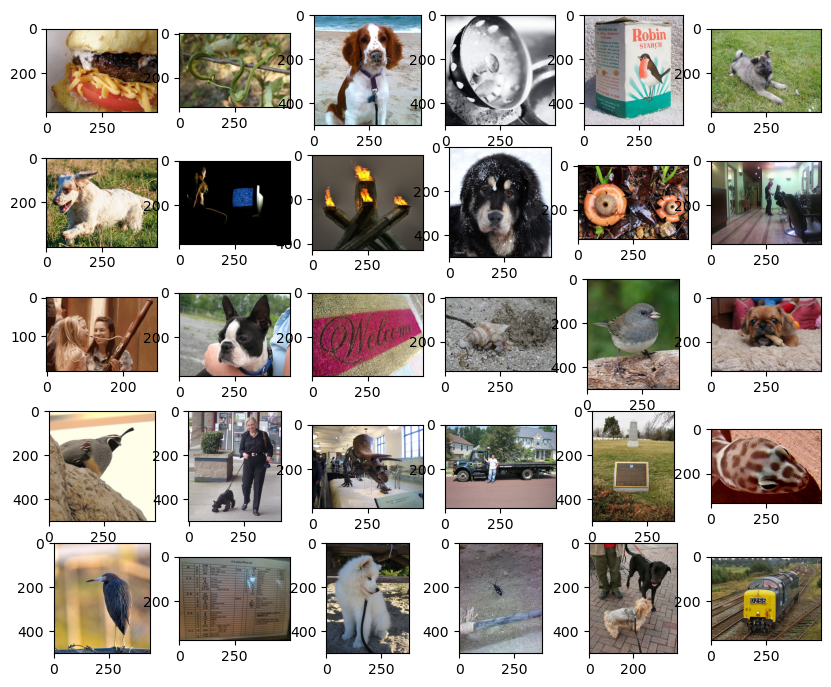

In [27]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    im = Image.open(valpath+l[i])
    plt.imshow(im)

plt.show()

In [18]:
protoDF = pd.read_csv(annotations+'prototypical_paths.csv')

protoDF = protoDF.merge(dfF, how='inner', on='file_name')

protoDF['proto_file_name'] = protoDF['file_name']

protoDF = protoDF.drop(columns=['file_name'])

NameError: name 'annotations' is not defined

In [29]:
protoDF

label      str_label               proto_file_name
0         0          tench  ILSVRC2012_val_00007197.JPEG
1         0          tench  ILSVRC2012_val_00026397.JPEG
2         0          tench  ILSVRC2012_val_00024327.JPEG
3         1       goldfish  ILSVRC2012_val_00000307.JPEG
4         1       goldfish  ILSVRC2012_val_00020785.JPEG
...     ...            ...                           ...
2995    998            ear  ILSVRC2012_val_00045809.JPEG
2996    998            ear  ILSVRC2012_val_00049555.JPEG
2997    999  toilet tissue  ILSVRC2012_val_00036056.JPEG
2998    999  toilet tissue  ILSVRC2012_val_00038905.JPEG
2999    999  toilet tissue  ILSVRC2012_val_00031618.JPEG

[3000 rows x 3 columns]

In [30]:
dfSample[['label', 'file_name']]

label                     file_name
32258    933  ILSVRC2012_val_00049472.JPEG
41698     55  ILSVRC2012_val_00003768.JPEG
48172    218  ILSVRC2012_val_00041473.JPEG
13867    828  ILSVRC2012_val_00001470.JPEG
28143    692  ILSVRC2012_val_00049179.JPEG
41146    174  ILSVRC2012_val_00023283.JPEG
35018    216  ILSVRC2012_val_00030540.JPEG
36065    851  ILSVRC2012_val_00039246.JPEG
18821    862  ILSVRC2012_val_00015178.JPEG
30231    244  ILSVRC2012_val_00023750.JPEG
7258     995  ILSVRC2012_val_00007306.JPEG
48622    423  ILSVRC2012_val_00014415.JPEG
28319    432  ILSVRC2012_val_00026219.JPEG
15364    195  ILSVRC2012_val_00009634.JPEG
18163    539  ILSVRC2012_val_00036975.JPEG
17082    125  ILSVRC2012_val_00040913.JPEG
6936      13  ILSVRC2012_val_00015410.JPEG
34274    154  ILSVRC2012_val_00040676.JPEG
15273     85  ILSVRC2012_val_00040002.JPEG
19365    196  ILSVRC2012_val_00046002.JPEG
37442     51  ILSVRC2012_val_00041922.JPEG
29428    864  ILSVRC2012_val_00021882.JPEG
10151    458  ILSVRC2012_val_00030117.JPEG
42656     38  ILSVRC2012_val_00021683.JPEG
48236    131  ILSVRC2012_val_00030263.JPEG
42837    922  ILSVRC2012_val_00018867.JPEG
24120    258  ILSVRC2012_val_00003808.JPEG
879      303  ILSVRC2012_val_00010411.JPEG
39815    201  ILSVRC2012_val_00017515.JPEG
11396    547  ILSVRC2012_val_00025106.JPEG

In [19]:
dfProtos = dfSample[['label', 'file_name']].merge(protoDF, how='inner', on = 'label')

NameError: name 'dfSample' is not defined

In [32]:
dfProtos.to_csv('imgs_for_app.csv', index=False)

In [33]:
l_example = dfProtos.proto_file_name.to_numpy()

In [34]:
l_anno = dfSample.file_name.to_numpy()

In [35]:
for f in l_anno:
    shutil.copy(valpath+f, '../App/Images/anno_imgs/'+f)

In [36]:
for f in l_example:
    shutil.copy(valpath+f, '../App/Images/example_imgs/'+f)

### Carls shit


In [35]:
df_app_images = pd.read_csv('../metalabel_objectivity/imgs_for_app.csv')
appendix = df_app_images[df_app_images.str_label.isin(['cheeseburger', 'barber chair', 'Welsh springer spaniel','triceratops' ]) ]

In [36]:
appendix

label                     file_name               str_label  \
0     933  ILSVRC2012_val_00049472.JPEG            cheeseburger   
1     933  ILSVRC2012_val_00049472.JPEG            cheeseburger   
2     933  ILSVRC2012_val_00049472.JPEG            cheeseburger   
6     218  ILSVRC2012_val_00030756.JPEG  Welsh springer spaniel   
7     218  ILSVRC2012_val_00030756.JPEG  Welsh springer spaniel   
8     218  ILSVRC2012_val_00030756.JPEG  Welsh springer spaniel   
33    423  ILSVRC2012_val_00014415.JPEG            barber chair   
34    423  ILSVRC2012_val_00014415.JPEG            barber chair   
35    423  ILSVRC2012_val_00014415.JPEG            barber chair   
60     51  ILSVRC2012_val_00041922.JPEG             triceratops   
61     51  ILSVRC2012_val_00041922.JPEG             triceratops   
62     51  ILSVRC2012_val_00041922.JPEG             triceratops   

                 proto_file_name  
0   ILSVRC2012_val_00027645.JPEG  
1   ILSVRC2012_val_00040728.JPEG  
2   ILSVRC2012_val_00030799.JPEG  
6   ILSVRC2012_val_00025704.JPEG  
7   ILSVRC2012_val_00041473.JPEG  
8   ILSVRC2012_val_00013127.JPEG  
33  ILSVRC2012_val_00007789.JPEG  
34  ILSVRC2012_val_00005762.JPEG  
35  ILSVRC2012_val_00001289.JPEG  
60  ILSVRC2012_val_00017962.JPEG  
61  ILSVRC2012_val_00035687.JPEG  
62  ILSVRC2012_val_00036430.JPEG

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/3363444225.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i,img in enumerate(appendix.proto_file_name[3*k:3*(k+1)]):


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


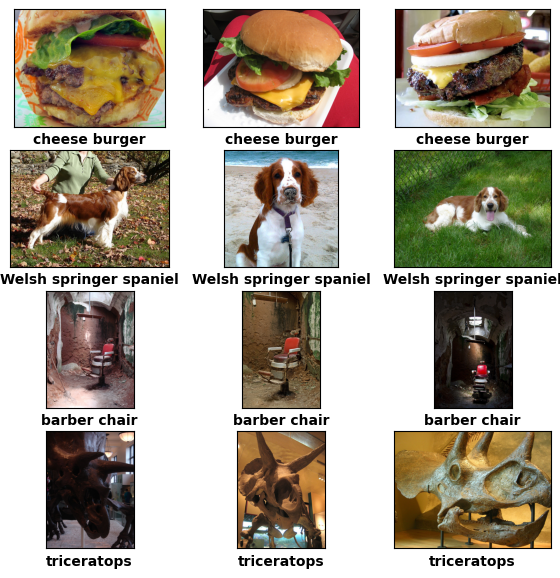

In [57]:
fig, ax = plt.subplots(4,3, figsize=(7,7))
for k in range(0,4):
    for i,img in enumerate(appendix.proto_file_name[3*k:3*(k+1)]):
        j = i % 3
        print(k,j)
        img = plt.imread( '../data/val_pics/' + img)
        center = list(np.shape(img)[:2])
        c1, c2 = round(center[0]/2), round(center[1]/2)
        #img = img[c1-CROP:c1+CROP, c2-CROP:c2+CROP]
        ax[k,j].imshow(img)
        plt.setp(ax[k,j].get_xticklabels(), visible=False)
        plt.setp(ax[k,j].get_yticklabels(), visible=False)
        ax[k,j].tick_params(axis='both', which='both', length=0)
        names = ['cheese burger', 'Welsh springer spaniel', 'barber chair', 'triceratops']
        ax[k,j].set_xlabel(names[k], fontweight = 'heavy')


In [12]:
df1 = pd.read_csv('val_imgs_df.csv')
df1.head()

file_name  multiple_objects  background  color  \
0  ILSVRC2012_val_00004487.JPEG                 0           1      0   
1  ILSVRC2012_val_00003963.JPEG                 0           1      1   
2  ILSVRC2012_val_00041992.JPEG                 0           0      1   
3  ILSVRC2012_val_00028056.JPEG                 0           1      0   
4  ILSVRC2012_val_00016832.JPEG                 0           0      1   

   brighter  darker  style  larger  smaller  object_blocking  ...  \
0         0       0      0       1        0                0  ...   
1         0       0      1       0        0                0  ...   
2         0       0      0       0        0                0  ...   
3         0       0      0       0        0                0  ...   
4         0       1      0       0        0                0  ...   

   partial_view  pattern  pose  shape  subcategory  texture  \
0             0        0     1      0            0        0   
1             0        0     1      0            0        0   
2             0        0     1      0            0        0   
3             0        1     1      1            0        0   
4             0        0     1      0            0        0   

                                      justification           one_word label  \
0                close up of a pan fried sea bass.   sea bass close up   762   
1                              sepia image of tiger  digitally altered   292   
2                               the bridge is brown          rare view   718   
3  the magnetic compass is on the bronze container          wood shape   635   
4                         A dark image of a church.               dark   497   

          str_label  
0        restaurant  
1             tiger  
2              pier  
3  magnetic compass  
4            church  

[5 rows x 21 columns]

In [13]:
df1['SUM'] = df1.iloc[:,1:17].sum(axis=1)

In [21]:
valpath = '../data/val_pics/'
introExamples = []
for mistake in df1.iloc[:,1:17].columns:
    instances = df1[(df1[mistake] == 1) & (df1['SUM'] == 1)].head()
    image4intro = instances['file_name'].to_list()[0]
    print(image4intro)
    introExamples.append(image4intro)
    plt.figure(figsize=(2,2))
    im = Image.open(valpath+image4intro)
    #plt.imshow(im)

    #plt.show()

ILSVRC2012_val_00004976.JPEG
ILSVRC2012_val_00002960.JPEG
ILSVRC2012_val_00015884.JPEG
ILSVRC2012_val_00008094.JPEG
ILSVRC2012_val_00014016.JPEG
ILSVRC2012_val_00034749.JPEG
ILSVRC2012_val_00003568.JPEG
ILSVRC2012_val_00025841.JPEG
ILSVRC2012_val_00038422.JPEG
ILSVRC2012_val_00001991.JPEG
ILSVRC2012_val_00017361.JPEG
ILSVRC2012_val_00044680.JPEG
ILSVRC2012_val_00021962.JPEG
ILSVRC2012_val_00039107.JPEG
ILSVRC2012_val_00033838.JPEG
ILSVRC2012_val_00005066.JPEG


<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [15]:
examples4intro = df1[df1['file_name'].isin(introExamples)]

In [25]:
dfProtos = examples4intro[['label', 'file_name', 'multiple_objects', 'background', 'color', 'brighter', 'darker',
       'style', 'larger', 'smaller', 'object_blocking', 'person_blocking',
       'partial_view', 'pattern', 'pose', 'shape', 'subcategory', 'texture']].merge(protoDF, how='inner', on = 'label')

In [17]:
l_anno = examples4intro.file_name.to_numpy()
l_proto = dfProtos['proto_file_name'].to_numpy()


In [102]:
for f in l_anno:
    shutil.copy(valpath+f, '../App/Images/intro_examples/'+f)

In [104]:
for f in l_proto:
    shutil.copy(valpath+f, '../App/Images/intro_protos/'+f)

In [26]:
dfProtos.to_csv('imgs_for_intro.csv', index=False)

In [28]:
dfProtos

label                     file_name  multiple_objects  background  color  \
0     296  ILSVRC2012_val_00021962.JPEG                 0           0      0   
1     296  ILSVRC2012_val_00021962.JPEG                 0           0      0   
2     296  ILSVRC2012_val_00021962.JPEG                 0           0      0   
3     478  ILSVRC2012_val_00015884.JPEG                 0           0      1   
4     478  ILSVRC2012_val_00015884.JPEG                 0           0      1   
5     478  ILSVRC2012_val_00015884.JPEG                 0           0      1   
6      31  ILSVRC2012_val_00033838.JPEG                 0           0      0   
7      31  ILSVRC2012_val_00033838.JPEG                 0           0      0   
8      31  ILSVRC2012_val_00033838.JPEG                 0           0      0   
9     391  ILSVRC2012_val_00002960.JPEG                 0           1      0   
10    391  ILSVRC2012_val_00002960.JPEG                 0           1      0   
11    391  ILSVRC2012_val_00002960.JPEG                 0           1      0   
12    992  ILSVRC2012_val_00044680.JPEG                 0           0      0   
13    992  ILSVRC2012_val_00044680.JPEG                 0           0      0   
14    992  ILSVRC2012_val_00044680.JPEG                 0           0      0   
15     98  ILSVRC2012_val_00034749.JPEG                 0           0      0   
16     98  ILSVRC2012_val_00034749.JPEG                 0           0      0   
17     98  ILSVRC2012_val_00034749.JPEG                 0           0      0   
18    989  ILSVRC2012_val_00039107.JPEG                 0           0      0   
19    989  ILSVRC2012_val_00039107.JPEG                 0           0      0   
20    989  ILSVRC2012_val_00039107.JPEG                 0           0      0   
21    978  ILSVRC2012_val_00004976.JPEG                 1           0      0   
22    978  ILSVRC2012_val_00004976.JPEG                 1           0      0   
23    978  ILSVRC2012_val_00004976.JPEG                 1           0      0   
24    439  ILSVRC2012_val_00025841.JPEG                 0           0      0   
25    439  ILSVRC2012_val_00025841.JPEG                 0           0      0   
26    439  ILSVRC2012_val_00025841.JPEG                 0           0      0   
27    582  ILSVRC2012_val_00003568.JPEG                 0           0      0   
28    582  ILSVRC2012_val_00003568.JPEG                 0           0      0   
29    582  ILSVRC2012_val_00003568.JPEG                 0           0      0   
30    816  ILSVRC2012_val_00038422.JPEG                 0           0      0   
31    816  ILSVRC2012_val_00038422.JPEG                 0           0      0   
32    816  ILSVRC2012_val_00038422.JPEG                 0           0      0   
33    101  ILSVRC2012_val_00017361.JPEG                 0           0      0   
34    101  ILSVRC2012_val_00017361.JPEG                 0           0      0   
35    101  ILSVRC2012_val_00017361.JPEG                 0           0      0   
36    949  ILSVRC2012_val_00005066.JPEG                 0           0      0   
37    949  ILSVRC2012_val_00005066.JPEG                 0           0      0   
38    949  ILSVRC2012_val_00005066.JPEG                 0           0      0   
39    975  ILSVRC2012_val_00014016.JPEG                 0           0      0   
40    975  ILSVRC2012_val_00014016.JPEG                 0           0      0   
41    975  ILSVRC2012_val_00014016.JPEG                 0           0      0   
42    293  ILSVRC2012_val_00008094.JPEG                 0           0      0   
43    293  ILSVRC2012_val_00008094.JPEG                 0           0      0   
44    293  ILSVRC2012_val_00008094.JPEG                 0           0      0   
45    529  ILSVRC2012_val_00001991.JPEG                 0           0      0   
46    529  ILSVRC2012_val_00001991.JPEG                 0           0      0   
47    529  ILSVRC2012_val_00001991.JPEG                 0           0      0   

    brighter  darker  style  larger  smaller  object_blocking  \
0          0      

In [24]:
df1.iloc[:,1:17].columns

Index(['multiple_objects', 'background', 'color', 'brighter', 'darker',
       'style', 'larger', 'smaller', 'object_blocking', 'person_blocking',
       'partial_view', 'pattern', 'pose', 'shape', 'subcategory', 'texture'],
      dtype='object')

## Correlation shit:


In [20]:
import seaborn as sns

In [21]:
df1 = pd.read_csv('val_imgs_df.csv')
df1

file_name  multiple_objects  background  color  \
0      ILSVRC2012_val_00004487.JPEG                 0           1      0   
1      ILSVRC2012_val_00003963.JPEG                 0           1      1   
2      ILSVRC2012_val_00041992.JPEG                 0           0      1   
3      ILSVRC2012_val_00028056.JPEG                 0           1      0   
4      ILSVRC2012_val_00016832.JPEG                 0           0      1   
...                             ...               ...         ...    ...   
48863  ILSVRC2012_val_00004973.JPEG                 0           1      1   
48864  ILSVRC2012_val_00038750.JPEG                 0           1      0   
48865  ILSVRC2012_val_00043497.JPEG                 0           1      1   
48866  ILSVRC2012_val_00005859.JPEG                 0           1      0   
48867  ILSVRC2012_val_00005939.JPEG                 0           0      0   

       brighter  darker  style  larger  smaller  object_blocking  ...  \
0             0       0      0       1        0                0  ...   
1             0       0      1       0        0                0  ...   
2             0       0      0       0        0                0  ...   
3             0       0      0       0        0                0  ...   
4             0       1      0       0        0                0  ...   
...         ...     ...    ...     ...      ...              ...  ...   
48863         0       0      0       0        0                0  ...   
48864         0       0      1       0        0                0  ...   
48865         0       0      0       0        0                0  ...   
48866         0       0      0       0        0                0  ...   
48867         0       0      0       0        0                0  ...   

       partial_view  pattern  pose  shape  subcategory  texture  \
0                 0        0     1      0            0        0   
1                 0        0     1      0            0        0   
2                 0        0     1      0            0        0   
3                 0        1     1      1            0        0   
4                 0        0     1      0            0        0   
...             ...      ...   ...    ...          ...      ...   
48863             0        0     1      0            0        0   
48864             0        0     1      0            0        0   
48865             0        0     1      0            0        0   
48866             0        1     1      0            0        0   
48867             0        1     1      1            1        0   

                                           justification            one_word  \
0                     close up of a pan fried sea bass.    sea bass close up   
1                                   sepia image of tiger   digitally altered   
2                                    the bridge is brown           rare view   
3       the magnetic compass is on the bronze container           wood shape   
4                              A dark image of a church.                dark   
...                                                  ...                 ...   
48863                                 color is different               color   
48864  front view image of rocking chair made by digi...  window digital art   
48865  right angle of analog clock with gold metallic...         right angle   
48866                A different design of a beer glass.  pattern background   
48867                        a different types of corals              corals   

      label         str_label  
0       762        restaurant  
1       292             tiger  
2       718              pier  
3       635  magnetic compass  
4       497            church  
...     ...               ...  
48863   973        coral reef  
48864   765     rocking chair  
48865   409      analog clock  
48866   441        beer glass  
48867   973        coral reef  

[48868 rows x 21 columns]

In [22]:
dframe = df1[['multiple_objects', 'background', 'color', 'brighter',
       'darker', 'style', 'larger', 'smaller', 'object_blocking',
       'person_blocking', 'partial_view', 'pattern', 'pose', 'shape',
       'subcategory', 'texture']]

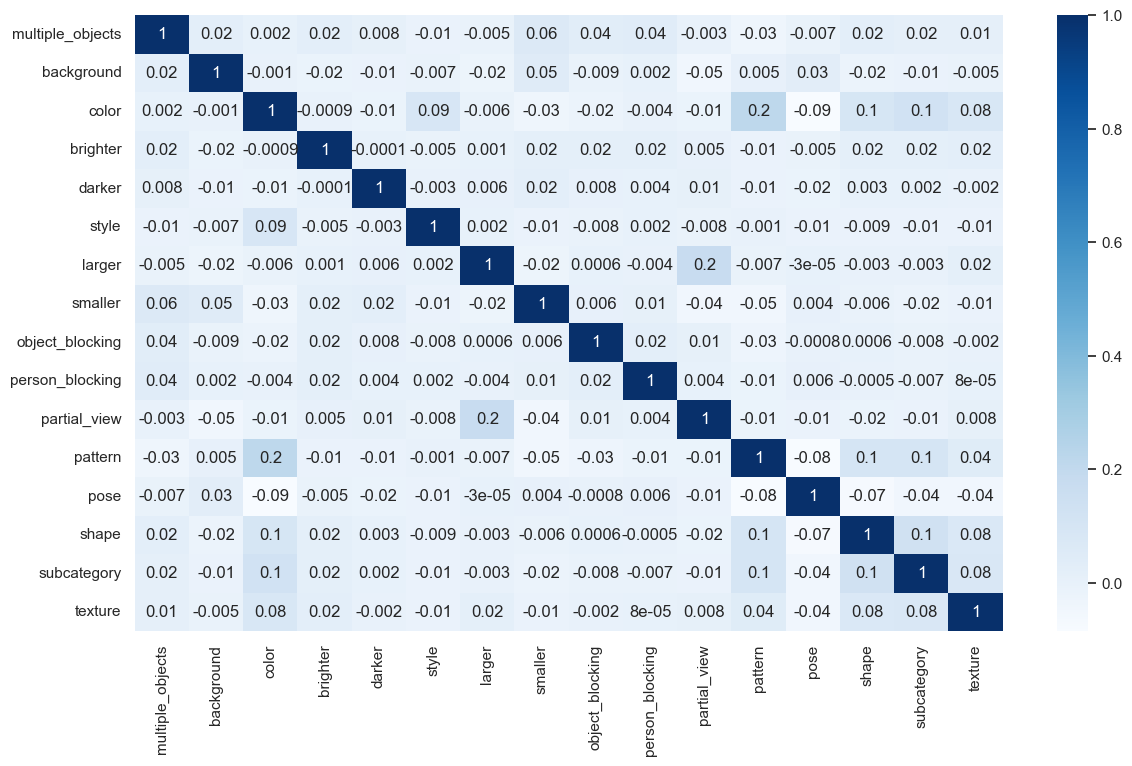

In [23]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dframe.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [25]:
path = '../data/annotations/'
dftrain_multi = pd.read_json(path + 'imagenet_x_train_multi_factor.jsonl', lines=True)
dfval_multi = pd.read_json(path + 'imagenet_x_val_multi_factor.jsonl', lines=True)
dftrain_multi_ = dftrain_multi.iloc[:,2:18]
dfval_multi_ = dfval_multi.iloc[:,2:18]
df_all = pd.concat([dftrain_multi_, dfval_multi_])

df_all.columns = df_all.columns.str.replace('_', ' ')
#print(np.cov(df_all.pose, df_all.background) / (np.std(df_all.pose) * np.std(df_all.background)) )
df_all = df_all[['pose', 'partial view', 'object blocking', 'person blocking',
       'multiple objects', 'smaller', 'larger', 'brighter', 'darker',
       'background', 'color', 'shape', 'texture', 'pattern', 'style',
       'subcategory']]

In [14]:
np.cov(df_all['pose'], df_all['background'])

#np.corrcoef(df_all['pose'], df_all['background'])
np.correlate(df_all['pose'], df_all['background'])/len(df_all['background'])
#sum(df_all['pose'] == df_all['background']) / len(df_all['background'])

array([0.69564566])

## Getting scores and confidence interval

In [5]:
df1 = pd.read_csv('transformed/scoresCategories.csv',index_col=0)
df2 = pd.read_csv('transformed/scoresFiles.csv',index_col=0)
df3 = pd.read_csv('transformed/scoresPersons.csv',index_col=0)
df4 = pd.read_csv('transformed/allData.csv',index_col=0)

dfTrue = pd.read_csv('df_30img_samples.csv',index_col=0)

In [6]:
dfTrue.iloc[:,1:16].mean().sort_values(ascending=False).index

Index(['pose', 'background', 'pattern', 'color', 'smaller', 'darker', 'larger',
       'subcategory', 'brighter', 'style', 'object_blocking',
       'person_blocking', 'partial_view', 'shape', 'texture'],
      dtype='object')

In [7]:
preds = df4[df4.person == 'Carl'].sort_values(['file_name']).iloc[:,1:17].to_numpy().flatten()
trues = dfTrue.sort_values(['file_name'])[['pose', 'partial_view', 'object_blocking', 'person_blocking', 'multiple_objects', 'smaller', 'larger',
                      'brighter', 'darker', 'background', 'color', 'shape', 'texture', 'pattern', 'style', 'subcategory']].iloc[:,:16].to_numpy().flatten()

from sklearn.metrics import jaccard_score
jaccard_score(preds,trues)

0.3305084745762712

In [8]:
df3[['person', 'accuracy', 'balacc', 'f1score', 'jaccard']].sort_values(by='person')
#Table3 = pd.concat([df3,df3[df3.person != 'BASELINE'].mean()],axis=1)
Table3 = df3.append(df3[df3.person != 'BASELINE'].mean(), ignore_index = True)

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/742769585.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Table3 = df3.append(df3[df3.person != 'BASELINE'].mean(), ignore_index = True)
/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/742769585.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Table3 = df3.append(df3[df3.person != 'BASELINE'].mean(), ignore_index = True)


In [9]:
print(Table3[['person', 'accuracy', 'balacc', 'f1score', 'jaccard']].sort_values(by='person').round(2).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
  person &  accuracy &  balacc &  f1score &  jaccard \\
\midrule
BASELINE &      0.83 &    0.50 &     0.00 &     0.00 \\
    Carl &      0.84 &    0.69 &     0.50 &     0.33 \\
 Joachim &      0.80 &    0.64 &     0.40 &     0.25 \\
   Jonas &      0.80 &    0.67 &     0.45 &     0.29 \\
  Julius &      0.85 &    0.76 &     0.59 &     0.42 \\
 Laurine &      0.74 &    0.72 &     0.48 &     0.31 \\
    Mads &      0.79 &    0.59 &     0.32 &     0.19 \\
   Nicki &      0.80 &    0.61 &     0.36 &     0.22 \\
  Spyros &      0.79 &    0.62 &     0.37 &     0.23 \\
     NaN &      0.80 &    0.66 &     0.43 &     0.28 \\
\bottomrule
\end{tabular}



/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/608102175.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(Table3[['person', 'accuracy', 'balacc', 'f1score', 'jaccard']].sort_values(by='person').round(2).to_latex(index=False))


In [10]:
yea = df4.iloc[:,1:17].var()
yea

pose                0.248603
partial_view        0.175534
object_blocking     0.028859
person_blocking     0.087347
multiple_objects    0.156079
smaller             0.181523
larger              0.124040
brighter            0.090335
darker              0.071995
background          0.240135
color               0.194534
shape               0.087347
texture             0.075120
pattern             0.081289
style               0.028859
subcategory         0.096227
dtype: float64

In [11]:
Table2 = df1.groupby('cate').mean()
Table2['variance'] = yea
kalle = Table2[['variance','accuracy', 'balacc', 'f1score', 'jaccard']].round(2).sort_values(['variance'],ascending=False)
orderman = ['pose', 'background', 'pattern', 'color', 'smaller', 'darker', 'larger',
       'subcategory', 'brighter', 'style', 'object_blocking',
       'person_blocking', 'partial_view', 'shape', 'texture']
kalle = kalle.reindex(orderman)
print(kalle.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  variance &  accuracy &  balacc &  f1score &  jaccard \\
cate            &           &           &         &          &          \\
\midrule
pose            &      0.25 &      0.45 &    0.45 &     0.57 &     0.45 \\
background      &      0.24 &      0.41 &    0.50 &     0.53 &     0.38 \\
pattern         &      0.08 &      0.66 &    0.56 &     0.22 &     0.14 \\
color           &      0.19 &      0.74 &    0.66 &     0.47 &     0.33 \\
smaller         &      0.18 &      0.79 &    0.76 &     0.30 &     0.19 \\
darker          &      0.07 &      0.95 &    0.92 &     0.60 &     0.52 \\
larger          &      0.12 &      0.84 &    0.60 &     0.08 &     0.04 \\
subcategory     &      0.10 &      0.87 &    0.56 &     0.08 &     0.05 \\
brighter        &      0.09 &      0.90 &    0.90 &     0.00 &     0.00 \\
style           &      0.03 &      0.97 &    0.97 &     0.00 &     0.00 \\
object\_blocking &      0.03 &      0.97 &    0.97 &     0.00 &     0.0

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/1531843429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Table2 = df1.groupby('cate').mean()
/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/1531843429.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kalle.to_latex())


In [12]:
Images2

NameError: name 'Images2' is not defined

In [13]:
billeder_svær = []
billeder_nem = []

Images2 = df2.groupby('file').mean()[['accuracy', 'balacc', 'f1score', 'jaccard']]
for i in range(len(list(Images2.columns))):
    k = np.argmin( Images2.iloc[:,i]) 
    print('shit', Images2.index[k])
    billeder_svær.append(Images2.index[k])

for i in range(len(list(Images2.columns))):
    p = np.argmax( Images2.iloc[:,i]) 
    print('magnifique', Images2.index[p])
    billeder_nem.append(Images2.index[p])

set_svær = list(set(billeder_svær))
set_nem = list(set(billeder_nem))
print(set_nem)


shit ILSVRC2012_val_00014415.JPEG
shit ILSVRC2012_val_00049472.JPEG
shit ILSVRC2012_val_00049472.JPEG
shit ILSVRC2012_val_00049472.JPEG
magnifique ILSVRC2012_val_00030756.JPEG
magnifique ILSVRC2012_val_00030756.JPEG
magnifique ILSVRC2012_val_00041922.JPEG
magnifique ILSVRC2012_val_00041922.JPEG
['ILSVRC2012_val_00030756.JPEG', 'ILSVRC2012_val_00041922.JPEG']


/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_59549/2542034547.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Images2 = df2.groupby('file').mean()[['accuracy', 'balacc', 'f1score', 'jaccard']]


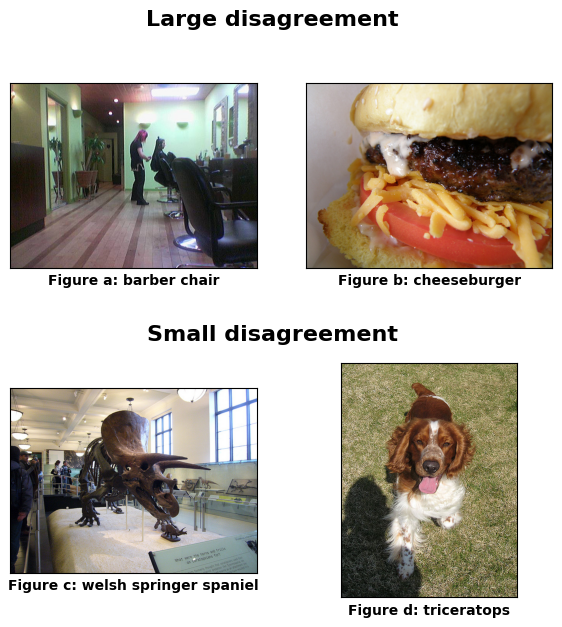

In [17]:
fig, ax = plt.subplots(2,2, figsize=(7,7))

CROP = int(350 / 2)

img = plt.imread( '../labeling_web_app/Images/anno_imgs/' + set_svær[1])
center = list(np.shape(img)[:2])
c1, c2 = round(center[0]/2), round(center[1]/2)
#img = img[c1-CROP:c1+CROP, c2-CROP:c2+CROP]
ax[0,0].imshow(img)
plt.setp(ax[0,0].get_xticklabels(), visible=False)
plt.setp(ax[0,0].get_yticklabels(), visible=False)
ax[0,0].tick_params(axis='both', which='both', length=0)
ax[0,0].set_xlabel('Figure a: barber chair', fontweight = 'heavy')


img = plt.imread( '../labeling_web_app/Images/anno_imgs/' + set_svær[0])
center = list(np.shape(img)[:2])
c1, c2 = round(center[0]/2), round(center[1]/2)
#img = img[c1-CROP:c1+CROP, c2-CROP:c2+CROP]
ax[0,1].imshow(img)
plt.setp(ax[0,1].get_xticklabels(), visible=False)
plt.setp(ax[0,1].get_yticklabels(), visible=False)
ax[0,1].tick_params(axis='both', which='both', length=0)
ax[0,1].set_xlabel('Figure b: cheeseburger', fontweight = 'heavy')



img = plt.imread( '../labeling_web_app/Images/anno_imgs/' + set_nem[1])
center = list(np.shape(img)[:2])
c1, c2 = round(center[0]/2), round(center[1]/2)
#img = img[c1-CROP:c1+CROP, c2-CROP:c2+CROP]
ax[1,0].imshow(img)
plt.setp(ax[1,0].get_xticklabels(), visible=False)
plt.setp(ax[1,0].get_yticklabels(), visible=False)
ax[1,0].tick_params(axis='both', which='both', length=0)
ax[1,0].set_xlabel('Figure c: welsh springer spaniel', fontweight = 'heavy')


img = plt.imread( '../labeling_web_app/Images/anno_imgs/' + set_nem[0])
center = list(np.shape(img)[:2])
c1, c2 = round(center[0]/2), round(center[1]/2)
#img = img[c1-CROP:c1+CROP, c2-CROP:c2+CROP]
ax[1,1].imshow(img)
plt.setp(ax[1,1].get_xticklabels(), visible=False)
plt.setp(ax[1,1].get_yticklabels(), visible=False)
ax[1,1].tick_params(axis='both', which='both', length=0)
ax[1,1].set_xlabel('Figure d: triceratops', fontweight = 'heavy')

plt.figtext(0.5,0.95, "Large disagreement", ha="center", va="top", fontsize=16, fontweight='bold')
plt.figtext(0.5,0.5, "Small disagreement", ha="center", va="top", fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace = 0.3 )
plt.show()

In [ ]:
# Get prototypical images for the classes 


In [13]:
print(['accuracy', 'balacc', 'f1score', 'jaccard'])
for name in set_svær + set_nem:
    sorteddf = df2[df2.person != 'BASELINE'].groupby('file').mean()[['accuracy', 'balacc', 'f1score', 'jaccard']].round(2)
    
    print(sorteddf[sorteddf.index == name].values)

['accuracy', 'balacc', 'f1score', 'jaccard']
[[0.76 0.46 0.06 0.04]]
[[0.63 0.59 0.4  0.26]]
[[0.91 0.85 0.74 0.62]]
[[0.95 0.91 0.65 0.54]]


/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_36200/2674454519.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorteddf = df2[df2.person != 'BASELINE'].groupby('file').mean()[['accuracy', 'balacc', 'f1score', 'jaccard']].round(2)
/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_36200/2674454519.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorteddf = df2[df2.person != 'BASELINE'].groupby('file').mean()[['accuracy', 'balacc', 'f1score', 'jaccard']].round(2)
/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_36200/2674454519.py:3: FutureWarning: The default value of nu

In [61]:
dfTrue[dfTrue.index == set_svær[0]]

multiple_objects  background  color  brighter  \
file_name                                                                     
ILSVRC2012_val_00049472.JPEG                 0           1      0         0   

                              darker  style  larger  smaller  object_blocking  \
file_name                                                                       
ILSVRC2012_val_00049472.JPEG       0      0       0        0                0   

                              person_blocking  partial_view  pattern  pose  \
file_name                                                                    
ILSVRC2012_val_00049472.JPEG                0             0        0     1   

                              shape  subcategory  texture  \
file_name                                                   
ILSVRC2012_val_00049472.JPEG      0            0        0   

                                                justification  \
file_name                                                       
ILSVRC2012_val_00049472.JPEG  side view image of cheeseburger   

                                      one_word  label     str_label  
file_name                                                            
ILSVRC2012_val_00049472.JPEG  white background    933  cheeseburger

In [16]:
dfAll = pd.read_csv('transformed/allData.csv')
dfAll = dfAll[dfAll['person'] != 'BASELINE']
dfAll[dfAll['file_name'] == set_svær[0]].groupby('file_name').mean()

NameError: name 'set_svær' is not defined

In [17]:
dfAll = pd.read_csv('transformed/allData.csv').iloc[:,1:]
dfAll = dfAll[dfAll['person'] != 'BASELINE']

# find the correlation between the different annotators




In [136]:
dfTrue[dfTrue.index == 'ILSVRC2012_val_00009634.JPEG']

multiple_objects  background  color  brighter  \
file_name                                                                     
ILSVRC2012_val_00009634.JPEG                 0           1      0         0   

                              darker  style  larger  smaller  object_blocking  \
file_name                                                                       
ILSVRC2012_val_00009634.JPEG       0      0       0        0                0   

                              person_blocking  partial_view  pattern  pose  \
file_name                                                                    
ILSVRC2012_val_00009634.JPEG                0             0        0     1   

                              shape  subcategory  texture  \
file_name                                                   
ILSVRC2012_val_00009634.JPEG      0            0        0   

                                             justification one_word  label  \
file_name                                                                    
ILSVRC2012_val_00009634.JPEG  An Boston bull taken outdoor  outdoor    195   

                                str_label  
file_name                                  
ILSVRC2012_val_00009634.JPEG  Boston bull

In [26]:
print('----------------means-----------------')
print(df3.iloc[:,2:18].mean())
print('---------------std------------------')
print(df3.iloc[:,2:18].std())

----------------means-----------------
balacc     0.646440
f1score    0.386411
cosine     0.501034
jaccard    0.250097
logloss    7.050205
dtype: float64
---------------std------------------
balacc     0.077592
f1score    0.166595
cosine     0.205071
jaccard    0.116670
logloss    1.186962
dtype: float64


In [9]:
confperson = pd.read_csv('transformed/scoresPersons.csv').iloc[:,1:]
confperson

person  accuracy    balacc   f1score    cosine   jaccard   logloss
0      Carl  0.835417  0.692579  0.496815  0.497310  0.330508  5.932185
1      Mads  0.789583  0.592321  0.322148  0.323793  0.192000  7.584185
2     Nicki  0.802083  0.614383  0.362416  0.364267  0.221311  7.133640
3   Joachim  0.797917  0.640918  0.404908  0.404916  0.253846  7.283822
4    Spyros  0.793750  0.619040  0.369427  0.369794  0.226562  7.434004
5  BASELINE  0.829167  0.500000  0.000000  1.000000  0.000000  6.157457
6    Julius  0.854167  0.761981  0.593023  0.593666  0.421488  5.256366
7     Jonas  0.797917  0.674807  0.451977  0.453201  0.291971  7.283822
8   Laurine  0.739583  0.721933  0.476987  0.502364  0.313187  9.386368

In [63]:
dfP = pd.read_csv('imgs_for_app.csv')

In [77]:
kkk = dfP[dfP.str_label == 'barber chair'].proto_file_name.to_list()
kkk

['ILSVRC2012_val_00007789.JPEG',
 'ILSVRC2012_val_00005762.JPEG',
 'ILSVRC2012_val_00001289.JPEG']

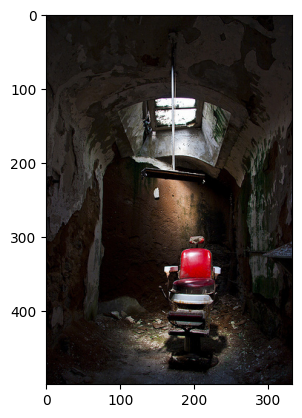

In [81]:
img = plt.imread( '../App/Images/example_imgs/' + kkk[2])
center = list(np.shape(img)[:2])
c1, c2 = round(center[0]/2), round(center[1]/2)
#img = img[c1-CROP:c1+CROP, c2-CROP:c2+CROP]
plt.imshow(img)
plt.show()

In [130]:
dfMV = (df4[df4.person != 'BASELINE'].groupby('file_name').mean() >= 0.5).replace({True: 1, False: 0})
dfMV.insert(0,column='file_name', value= dfMV.index)
dfMV = dfMV.reset_index(drop=True)
dfMV['labels'] = [['true']] * 30
dfMV['person'] = ['MV'] * 30

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_36200/4144936652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMV = (df4[df4.person != 'BASELINE'].groupby('file_name').mean() >= 0.5).replace({True: 1, False: 0})


In [120]:
dfMV.to_csv('transformed/MV.csv')

In [19]:
from scipy import spatial
from sklearn.metrics import jaccard_score, log_loss, accuracy_score, f1_score
import numpy as np
from os import listdir
import os
from sklearn.metrics import balanced_accuracy_score
import scipy.stats as st

categories = ['pose', 'partial_view', 'object_blocking', 'person_blocking', 'multiple_objects', 'smaller', 'larger',
                      'brighter', 'darker', 'background', 'color', 'shape', 'texture', 'pattern', 'style', 'subcategory']

<AxesSubplot: >

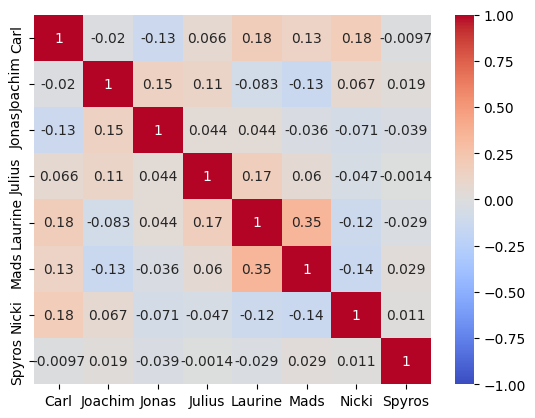

In [24]:
dataframe = dfAll.sort_values(['person'])

preds = dataframe[categories].to_numpy().flatten()
preds_ = preds.reshape(30*16,8)
preds_person = pd.DataFrame(preds_, columns=['Carl', 'Joachim', 'Jonas', 'Julius', 'Laurine', 'Mads', 'Nicki', 'Spyros'])
sns.heatmap(preds_person.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [36]:
from sklearn.metrics import jaccard_score, log_loss, accuracy_score, f1_score

In [38]:
acc_dict = {}
for person in preds_person.columns:
    for person2 in preds_person.columns:
        if person != person2:
            # get accuracy
            f1 = f1_score(preds_person[person], preds_person[person2])
            acc_dict[person + ' vs ' + person2] = f1
   

In [40]:
pd.DataFrame.from_dict(acc_dict, orient='index').mean()

0    0.183833
dtype: float64

In [135]:
def Tests(personName: str, dataframe: pd.DataFrame, dataframeTrue: pd.DataFrame):

    dataframe = dataframe.sort_values(['file_name'])
    dataframeTrue = dataframeTrue.sort_values(['file_name'])

    # All data at ones
    preds = dataframe[categories].to_numpy().flatten()
    trues = dataframeTrue[categories].to_numpy().flatten()

    accuracy = accuracy_score(trues, preds)
    bal_acc = balanced_accuracy_score(trues, preds)
    f1score = f1_score(trues, preds)
    cos_sim = 1 - spatial.distance.cosine(trues, preds)
    jac_score = jaccard_score(trues, preds)
    log_loss1 = log_loss(y_true= trues, y_pred= preds)

    # Seperate data
    personScores = {'person': [personName], 'accuracy': [], 'balacc': [], 'f1score': [], 'cosine': [], 'jaccard': [], 'logloss': []}
    fileScores = {'file': [], 'accuracy': [], 'balacc': [], 'f1score': [], 'cosine': [], 'jaccard': [], 'logloss': [], 'person': [personName]*30}
    cateScores = {'cate': categories, 'accuracy': [],'balacc': [], 'f1score': [], 'cosine': [], 'jaccard': [], 'logloss': [], 'person': [personName]*16}

    personScores['accuracy'].append(accuracy)
    personScores['balacc'].append(bal_acc)
    personScores['f1score'].append(f1score)
    personScores['cosine'].append(cos_sim)
    personScores['jaccard'].append(jac_score)
    personScores['logloss'].append(log_loss1)
    
    
    for _, row in dataframeTrue.iterrows():

        file, labels = row['file_name'], row[categories]
        #Get labels in correct order
        trueLabels = labels[categories].values
        #print(file)
        userLabels = dataframe[dataframe.file_name == file][categories].values[0]
        #print(userLabels, '\n', trueLabels)

        # Cosine and Jaccard and Binary Cross Entropy
        accuracy = accuracy_score(trueLabels.tolist(), userLabels.tolist())
        bal_acc = balanced_accuracy_score(trueLabels.tolist(), userLabels.tolist())
        f1score = f1_score(np.array(trueLabels.tolist()), np.array(userLabels.tolist()))
        cos_sim = 1 - spatial.distance.cosine(trueLabels, userLabels)
        jac_score = jaccard_score(trueLabels.tolist(), userLabels.tolist())
        log_loss1 = log_loss(y_true = trueLabels.astype('int'),y_pred = userLabels.astype('int'))

        fileScores['file'].append(file)
        fileScores['balacc'].append(bal_acc)
        fileScores['accuracy'].append(accuracy)
        fileScores['f1score'].append(f1score)
        fileScores['cosine'].append(cos_sim)
        fileScores['jaccard'].append(jac_score)
        fileScores['logloss'].append(log_loss1)
    
    for column in categories:

        accuracy = accuracy_score(dataframeTrue[column],dataframe[column])
        bal_acc = balanced_accuracy_score(dataframeTrue[column],dataframe[column])
        f1score = f1_score(dataframeTrue[column],dataframe[column])
        cos_sim = 1 - spatial.distance.cosine(dataframeTrue[column],dataframe[column])
        jac_score = jaccard_score(dataframeTrue[column].tolist(), dataframe[column].tolist())
        log_loss1 = log_loss(y_pred = dataframe[column].astype('int'),y_true = dataframeTrue[column].astype('int'), labels= [0,1])
        
        cateScores['accuracy'].append(accuracy)
        cateScores['balacc'].append(bal_acc)
        cateScores['f1score'].append(f1score)
        cateScores['cosine'].append(cos_sim)
        cateScores['jaccard'].append(jac_score)
        cateScores['logloss'].append(log_loss1)
    
    print(len(fileScores['f1score'])   ,    len(cateScores['f1score']))
    return fileScores, cateScores, personScores

In [143]:
img,cate,person = Tests('MV', dfMV, dfTrue)

30 16


/Users/carlschmidt/anaconda3/envs/bach/lib/python3.10/site-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/carlschmidt/anaconda3/envs/bach/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/carlschmidt/anaconda3/envs/bach/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/carlschmidt/anaconda3/envs/bach/lib/python3.10/site-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/carlschmidt/anaconda3/envs/bach/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn(

In [137]:
dfTrue.insert(0,column='file_name', value= dfTrue.index)
dfTrue = dfTrue.reset_index(drop=True)

In [146]:
pd.DataFrame.from_dict(cate)

cate  accuracy    balacc   f1score    cosine   jaccard  \
0               pose  0.566667  0.566667  0.723404  0.752773  0.566667   
1       partial_view  0.733333  0.733333  0.000000  1.000000  0.000000   
2    object_blocking  0.966667  0.966667  0.000000  1.000000  0.000000   
3    person_blocking  0.866667  0.866667  0.000000  1.000000  0.000000   
4   multiple_objects  0.833333  0.833333  0.000000  1.000000  0.000000   
5            smaller  0.800000  0.892857  0.400000  0.500000  0.250000   
6             larger  0.800000  0.413793  0.000000  0.000000  0.000000   
7           brighter  0.966667  0.966667  0.000000  1.000000  0.000000   
8             darker  0.966667  0.982759  0.666667  0.707107  0.500000   
9         background  0.533333  0.517857  0.681818  0.708683  0.517241   
10             color  0.866667  0.869318  0.777778  0.782624  0.636364   
11             shape  0.933333  0.933333  0.000000  1.000000  0.000000   
12           texture  1.000000  1.000000  0.000000  1.000000  0.000000   
13           pattern  0.666667  0.545455  0.166667  0.301511  0.090909   
14             style  0.966667  0.966667  0.000000  1.000000  0.000000   
15       subcategory  0.833333  0.431034  0.000000  0.000000  0.000000   

         logloss person  
0   1.561892e+01     MV  
1   9.611641e+00     MV  
2   1.201455e+00     MV  
3   4.805820e+00     MV  
4   6.007276e+00     MV  
5   7.208731e+00     MV  
6   7.208731e+00     MV  
7   1.201455e+00     MV  
8   1.201455e+00     MV  
9   1.682037e+01     MV  
10  4.805820e+00     MV  
11  2.402910e+00     MV  
12  2.220446e-16     MV  
13  1.201455e+01     MV  
14  1.201455e+00     MV  
15  6.007276e+00     MV

#### MV ser ud til at gøre det en del bedre end mean

In [147]:
person

{'person': ['MV'],
 'accuracy': [0.83125],
 'balacc': [0.7094313028557422],
 'f1score': [0.5149700598802395],
 'cosine': [0.5150531724441305],
 'jaccard': [0.3467741935483871],
 'logloss': []}

### top k = 1

In [44]:
dfMAX = (df4[df4.person != 'BASELINE'].groupby('file_name').mean()) #.replace({True: 1, False: 0})
dfMAX.sort_index()

/var/folders/0l/26n95fy50m782tbz32d5_1g40000gn/T/ipykernel_55954/120558308.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMAX = (df4[df4.person != 'BASELINE'].groupby('file_name').mean()) #.replace({True: 1, False: 0})


pose  partial_view  object_blocking  \
file_name                                                            
ILSVRC2012_val_00001470.JPEG  0.375         0.125            0.000   
ILSVRC2012_val_00003768.JPEG  0.375         0.000            0.000   
ILSVRC2012_val_00003808.JPEG  0.750         0.000            0.125   
ILSVRC2012_val_00007306.JPEG  0.125         0.000            0.000   
ILSVRC2012_val_00009634.JPEG  0.375         0.875            0.000   
ILSVRC2012_val_00010411.JPEG  0.250         0.000            0.000   
ILSVRC2012_val_00014415.JPEG  0.625         0.875            0.250   
ILSVRC2012_val_00015178.JPEG  0.500         0.125            0.125   
ILSVRC2012_val_00015410.JPEG  0.625         0.000            0.000   
ILSVRC2012_val_00017515.JPEG  1.000         0.000            0.000   
ILSVRC2012_val_00018867.JPEG  0.125         0.000            0.000   
ILSVRC2012_val_00021683.JPEG  0.875         1.000            0.000   
ILSVRC2012_val_00021882.JPEG  0.375         0.125            0.000   
ILSVRC2012_val_00023283.JPEG  0.625         0.000            0.000   
ILSVRC2012_val_00023750.JPEG  0.625         0.500            0.000   
ILSVRC2012_val_00025106.JPEG  0.500         0.000            0.000   
ILSVRC2012_val_00026219.JPEG  0.625         0.500            0.000   
ILSVRC2012_val_00030117.JPEG  0.000         0.000            0.000   
ILSVRC2012_val_00030263.JPEG  1.000         0.125            0.000   
ILSVRC2012_val_00030540.JPEG  0.250         0.000            0.000   
ILSVRC2012_val_00030756.JPEG  0.875         0.125            0.000   
ILSVRC2012_val_00036975.JPEG  0.750         0.750            0.000   
ILSVRC2012_val_00039246.JPEG  0.250         0.125            0.000   
ILSVRC2012_val_00040002.JPEG  0.625         0.875            0.500   
ILSVRC2012_val_00040676.JPEG  0.250         0.250            0.000   
ILSVRC2012_val_00040913.JPEG  0.625         0.125            0.000   
ILSVRC2012_val_00041922.JPEG  0.750         0.125            0.000   
ILSVRC2012_val_00046002.JPEG  0.750         0.000            0.000   
ILSVRC2012_val_00049179.JPEG  0.250         0.000            0.000   
ILSVRC2012_val_00049472.JPEG  0.125         1.000            0.000   

                              person_blocking  multiple_objects  smaller  \
file_name                                                                  
ILSVRC2012_val_00001470.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00003768.JPEG            0.000             0.250    0.750   
ILSVRC2012_val_00003808.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00007306.JPEG            0.000             0.250    0.125   
ILSVRC2012_val_00009634.JPEG            0.750             0.125    0.000   
ILSVRC2012_val_00010411.JPEG            0.000             0.375    1.000   
ILSVRC2012_val_00014415.JPEG            0.625             0.875    0.375   
ILSVRC2012_val_00015178.JPEG            0.000             0.375    0.000   
ILSVRC2012_val_00015410.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00017515.JPEG            0.000             1.000    0.750   
ILSVRC2012_val_00018867.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00021683.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00021882.JPEG            1.000             0.375    0.250   
ILSVRC2012_val_00023283.JPEG            0.000             0.000    0.375   
ILSVRC2012_val_00023750.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00025106.JPEG            0.000             0.125    0.000   
ILSVRC2012_val_00026219.JPEG            0.500             0.500    0.125   
ILSVRC2012_val_00030117.JPEG            0.000             0.375    1.000   
ILSVRC2012_val_00030263.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00030540.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00030756.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00036975.JPEG            0.

In [45]:
# Get maximum one liner
most_votes_list = [row.idxmax() for _,row in dfMAX.sort_index().iterrows()]
most_votes_list

['larger',
 'smaller',
 'pose',
 'color',
 'partial_view',
 'smaller',
 'partial_view',
 'background',
 'background',
 'pose',
 'color',
 'partial_view',
 'person_blocking',
 'pose',
 'background',
 'pose',
 'pose',
 'smaller',
 'pose',
 'pose',
 'pose',
 'pose',
 'darker',
 'partial_view',
 'background',
 'color',
 'smaller',
 'smaller',
 'larger',
 'partial_view']

In [58]:
dfJsontop1 = pd.read_json(annotations+'imagenet_x_val_top_factor.jsonl', lines=True)
dfJsontop1


file_name  class  multiple_objects  background  \
0      ILSVRC2012_val_00004487.JPEG    762                 0           0   
1      ILSVRC2012_val_00003963.JPEG    292                 0           0   
2      ILSVRC2012_val_00041992.JPEG    718                 0           0   
3      ILSVRC2012_val_00028056.JPEG    635                 0           0   
4      ILSVRC2012_val_00016832.JPEG    497                 0           0   
...                             ...    ...               ...         ...   
48863  ILSVRC2012_val_00004973.JPEG    973                 0           0   
48864  ILSVRC2012_val_00038750.JPEG    765                 0           1   
48865  ILSVRC2012_val_00043497.JPEG    409                 0           0   
48866  ILSVRC2012_val_00005859.JPEG    441                 0           0   
48867  ILSVRC2012_val_00005939.JPEG    973                 0           0   

       color  brighter  darker  style  larger  smaller  object_blocking  \
0          0         0       0      0       1        0                0   
1          1         0       0      0       0        0                0   
2          0         0       0      0       0        0                0   
3          0         0       0      0       0        0                0   
4          0         0       1      0       0        0                0   
...      ...       ...     ...    ...     ...      ...              ...   
48863      1         0       0      0       0        0                0   
48864      0         0       0      0       0        0                0   
48865      1         0       0      0       0        0                0   
48866      0         0       0      0       0        0                0   
48867      0         0       0      0       0        0                0   

       person_blocking  partial_view  pattern  pose  shape  subcategory  \
0                    0             0        0     0      0            0   
1                    0             0        0     0      0            0   
2                    0             0        0     1      0            0   
3                    0             0        1     0      0            0   
4                    0             0        0     0      0            0   
...                ...           ...      ...   ...    ...          ...   
48863                0             0        0     0      0            0   
48864                0             0        0     0      0            0   
48865                0             0        0     0      0            0   
48866                0             0        1     0      0            0   
48867                0             0        1     0      0            0   

       texture                                      justification  \
0            0                 close up of a pan fried sea bass.    
1            0                               sepia image of tiger   
2            0                                the bridge is brown   
3            0   the magnetic compass is on the bronze container    
4            0                          A dark image of a church.   
...        ...                                                ...   
48863        0                                 color is different   
48864        0  front view image of rocking chair made by digi...   
48865        0  right angle of analog clock with gold metallic...   
48866        0                A different design of a beer glass.   
48867        0                        a different types of corals   

                 one_word  
0       sea bass close up  
1       digitally altered  
2               rare view  
3              wood shape  
4                    dark  
...                   ...  
48863               color  
48864  window digital art  
48865         right angle  
48866  pattern background  
48867              corals  

[48868 rows x 20 columns]

In [70]:
dfTruetop1 = dfJsontop1[dfJsontop1.file_name.isin(list(dfTrue.sort_index().index))]
dfTruetop1 = dfTruetop1.sort_values('file_name')

In [79]:
truetop1_list = [(row[row == 1].index[0]) for _,row in dfTruetop1.sort_index().iterrows()]


In [84]:
np.sum([most_votes_list[i] == truetop1_list[i] for i in range(len(truetop1_list)) ])

8

In [85]:
dfTruetop1

file_name  class  multiple_objects  background  \
13867  ILSVRC2012_val_00001470.JPEG    828                 0           1   
41698  ILSVRC2012_val_00003768.JPEG     55                 0           0   
24120  ILSVRC2012_val_00003808.JPEG    258                 0           0   
7258   ILSVRC2012_val_00007306.JPEG    995                 0           0   
15364  ILSVRC2012_val_00009634.JPEG    195                 0           1   
879    ILSVRC2012_val_00010411.JPEG    303                 0           0   
48622  ILSVRC2012_val_00014415.JPEG    423                 0           1   
18821  ILSVRC2012_val_00015178.JPEG    862                 0           0   
6936   ILSVRC2012_val_00015410.JPEG     13                 0           0   
39815  ILSVRC2012_val_00017515.JPEG    201                 0           1   
42837  ILSVRC2012_val_00018867.JPEG    922                 0           0   
42656  ILSVRC2012_val_00021683.JPEG     38                 0           1   
29428  ILSVRC2012_val_00021882.JPEG    864                 0           0   
41146  ILSVRC2012_val_00023283.JPEG    174                 0           1   
30231  ILSVRC2012_val_00023750.JPEG    244                 0           0   
11396  ILSVRC2012_val_00025106.JPEG    547                 0           0   
28319  ILSVRC2012_val_00026219.JPEG    432                 0           0   
10151  ILSVRC2012_val_00030117.JPEG    458                 0           0   
48236  ILSVRC2012_val_00030263.JPEG    131                 0           0   
35018  ILSVRC2012_val_00030540.JPEG    216                 0           1   
13722  ILSVRC2012_val_00030756.JPEG    218                 0           0   
18163  ILSVRC2012_val_00036975.JPEG    539                 0           1   
36065  ILSVRC2012_val_00039246.JPEG    851                 0           0   
15273  ILSVRC2012_val_00040002.JPEG     85                 0           1   
34274  ILSVRC2012_val_00040676.JPEG    154                 0           0   
17082  ILSVRC2012_val_00040913.JPEG    125                 0           0   
37442  ILSVRC2012_val_00041922.JPEG     51                 0           1   
19365  ILSVRC2012_val_00046002.JPEG    196                 0           1   
28143  ILSVRC2012_val_00049179.JPEG    692                 0           0   
32258  ILSVRC2012_val_00049472.JPEG    933                 0           0   

       color  brighter  darker  style  larger  smaller  object_blocking  \
13867      0         0       0      0       0        0                0   
41698      0         0       0      0       0        0                0   
24120      0         0       0      0       0        0                0   
7258       0         0       0      0       0        0                0   
15364      0         0       0      0       0        0                0   
879        0         0       0      0       0        0                0   
48622      0         0       0      0       0        0                0   
18821      0         0       0      0       0        0                0   
6936       0         0       0      0       0        0                0   
39815      0         0       0      0       0        0                0   
42837      0         0       0      0       0        0                0   
42656      0         0       0      0       0        0                0   
29428      1         0       0      0       0        0                0   
41146      0         0       0      0       0        0                0   
30231      0         0       0      0       0        0                0   
11396      0         0       0      0       0        0                0   
28319      0         0       0      0       0        0                0   
10151      0         0       0      0       0        0                0   
48236      0         0       0      0       0        0                0   
35018      0         0       0      0       0        0                0   
13722      0         0       0      0       0        0                0   
18163      0       

In [86]:
dfMAX

pose  partial_view  object_blocking  \
file_name                                                            
ILSVRC2012_val_00001470.JPEG  0.375         0.125            0.000   
ILSVRC2012_val_00003768.JPEG  0.375         0.000            0.000   
ILSVRC2012_val_00003808.JPEG  0.750         0.000            0.125   
ILSVRC2012_val_00007306.JPEG  0.125         0.000            0.000   
ILSVRC2012_val_00009634.JPEG  0.375         0.875            0.000   
ILSVRC2012_val_00010411.JPEG  0.250         0.000            0.000   
ILSVRC2012_val_00014415.JPEG  0.625         0.875            0.250   
ILSVRC2012_val_00015178.JPEG  0.500         0.125            0.125   
ILSVRC2012_val_00015410.JPEG  0.625         0.000            0.000   
ILSVRC2012_val_00017515.JPEG  1.000         0.000            0.000   
ILSVRC2012_val_00018867.JPEG  0.125         0.000            0.000   
ILSVRC2012_val_00021683.JPEG  0.875         1.000            0.000   
ILSVRC2012_val_00021882.JPEG  0.375         0.125            0.000   
ILSVRC2012_val_00023283.JPEG  0.625         0.000            0.000   
ILSVRC2012_val_00023750.JPEG  0.625         0.500            0.000   
ILSVRC2012_val_00025106.JPEG  0.500         0.000            0.000   
ILSVRC2012_val_00026219.JPEG  0.625         0.500            0.000   
ILSVRC2012_val_00030117.JPEG  0.000         0.000            0.000   
ILSVRC2012_val_00030263.JPEG  1.000         0.125            0.000   
ILSVRC2012_val_00030540.JPEG  0.250         0.000            0.000   
ILSVRC2012_val_00030756.JPEG  0.875         0.125            0.000   
ILSVRC2012_val_00036975.JPEG  0.750         0.750            0.000   
ILSVRC2012_val_00039246.JPEG  0.250         0.125            0.000   
ILSVRC2012_val_00040002.JPEG  0.625         0.875            0.500   
ILSVRC2012_val_00040676.JPEG  0.250         0.250            0.000   
ILSVRC2012_val_00040913.JPEG  0.625         0.125            0.000   
ILSVRC2012_val_00041922.JPEG  0.750         0.125            0.000   
ILSVRC2012_val_00046002.JPEG  0.750         0.000            0.000   
ILSVRC2012_val_00049179.JPEG  0.250         0.000            0.000   
ILSVRC2012_val_00049472.JPEG  0.125         1.000            0.000   

                              person_blocking  multiple_objects  smaller  \
file_name                                                                  
ILSVRC2012_val_00001470.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00003768.JPEG            0.000             0.250    0.750   
ILSVRC2012_val_00003808.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00007306.JPEG            0.000             0.250    0.125   
ILSVRC2012_val_00009634.JPEG            0.750             0.125    0.000   
ILSVRC2012_val_00010411.JPEG            0.000             0.375    1.000   
ILSVRC2012_val_00014415.JPEG            0.625             0.875    0.375   
ILSVRC2012_val_00015178.JPEG            0.000             0.375    0.000   
ILSVRC2012_val_00015410.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00017515.JPEG            0.000             1.000    0.750   
ILSVRC2012_val_00018867.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00021683.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00021882.JPEG            1.000             0.375    0.250   
ILSVRC2012_val_00023283.JPEG            0.000             0.000    0.375   
ILSVRC2012_val_00023750.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00025106.JPEG            0.000             0.125    0.000   
ILSVRC2012_val_00026219.JPEG            0.500             0.500    0.125   
ILSVRC2012_val_00030117.JPEG            0.000             0.375    1.000   
ILSVRC2012_val_00030263.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00030540.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00030756.JPEG            0.000             0.000    0.000   
ILSVRC2012_val_00036975.JPEG            0.

### Get Top-k class distribution

In [48]:

dfJson = pd.read_json(annotations+'imagenet_x_val_top_factor.jsonl', lines=True)
# Find distribution of labels and save as dict
dictValTop1 = dfJson.iloc[:,2:18].sum(axis=0).to_dict()

labels = ['background',
 'brighter',
 'color',
 'darker',
 'larger',
 'multiple_objects',
 'object_blocking',
 'partial_view',
 'pattern',
 'person_blocking',
 'pose',
 'shape',
 'smaller',
 'style',
 'subcategory',
 'texture']
kalle= [dictValTop1[key] for key in labels]

In [49]:
kalle

[15441,
 45,
 6476,
 125,
 157,
 40,
 78,
 678,
 6571,
 61,
 16080,
 696,
 1473,
 45,
 614,
 286]

In [20]:

dfJson = pd.read_json(annotations+'imagenet_x_train_top_factor.jsonl', lines=True)
# Find distribution of labels and save as dict
dfJson.iloc[:,2:16].sum(axis=0).to_dict()

{'multiple_objects': 5,
 'background': 2914,
 'color': 1443,
 'brighter': 4,
 'darker': 26,
 'style': 17,
 'larger': 35,
 'smaller': 495,
 'object_blocking': 18,
 'person_blocking': 16,
 'partial_view': 118,
 'pattern': 2525,
 'pose': 3260,
 'shape': 127}

### Plot last data constellation


In [32]:
dfF['str_label']

0                tench
1                tench
2                tench
3                tench
4                tench
             ...      
49995    toilet tissue
49996    toilet tissue
49997    toilet tissue
49998    toilet tissue
49999    toilet tissue
Name: str_label, Length: 50000, dtype: object

In [33]:
# Make histogram of labels in dfF
dfF['str_label'].value_counts()


crane            100
maillot          100
tench             50
mountain bike     50
motor scooter     50
                ... 
guinea pig        50
sorrel            50
zebra             50
hog               50
toilet tissue     50
Name: str_label, Length: 998, dtype: int64

In [35]:
dftrain_multi['str_label'] = dftrain_multi['class'].apply(lambda x : LoL[x])
#dfF['str_label'] = dfF['label'].apply(lambda x : LoL[x])

['maillot', 'tape player', 'horned viper', 'Eskimo dog', 'monitor', 'cassette player']
['llama', 'coucal', 'convertible', 'bullet train', 'trilobite', 'king penguin']


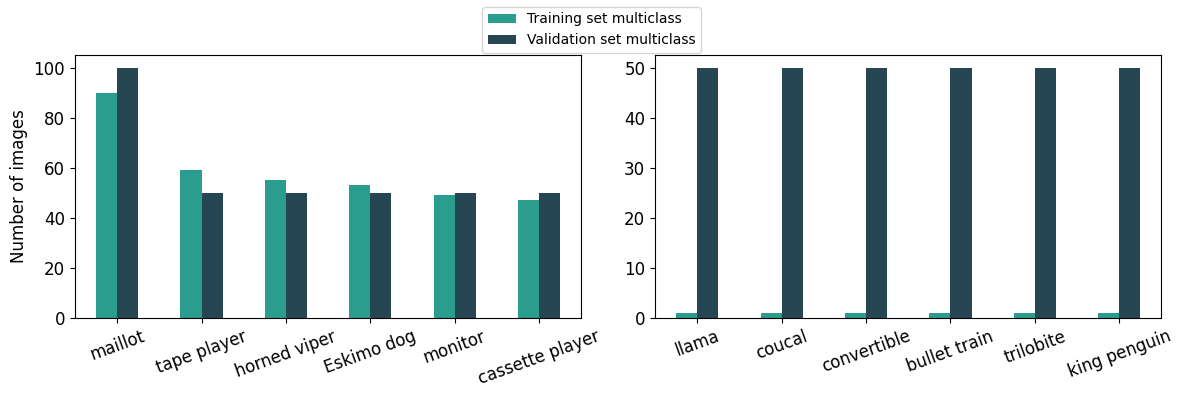

In [141]:
N = len(dftrain_multi['str_label'].value_counts())
colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]

fig, axs = plt.subplots(1,2,figsize=(16, 4))

cate =  [['maillot', 'tape player', 'horned viper', 'Eskimo dog', 'monitor',
       'cassette player'],[ 'llama', 'coucal', 'convertible', 'bullet train',
       'trilobite', 'king penguin'] ]

train_small = dftrain_multi['str_label'].value_counts()[[0,1,2,3,4,5,N-7,N-5,N-4,N-3,N-2,N-1]] #.plot(kind='bar', figsize=(12,4), alpha=0.4, fontsize=20, color=colors[0])
val_large = dfF['str_label'].value_counts()[['maillot', 'tape player', 'horned viper', 'Eskimo dog', 'monitor',
       'cassette player', 'llama', 'coucal', 'convertible',
       'bullet train', 'trilobite', 'king penguin']]
dfboth = pd.concat([train_small, val_large], axis=1)
for i,ax in enumerate(axs):
    if i == 0:
        ax.set_ylabel('Number of images', fontsize=12)

    print(cate[i])
    ax = dfboth.loc[cate[i]].plot(kind='bar', ax=ax, legend=False, figsize=(12,4), fontsize=12, color=[colors[1],colors[0]], rot=20)
    
fig.legend(['Training set multiclass', 'Validation set multiclass'], fontsize=10, loc=9)
fig.tight_layout()
fig.subplots_adjust(top=0.87)



# .plot(kind='bar', figsize=(12,4),alpha = 0.4, fontsize=20, color=colors[1])
#dfboth.set_xlabel('Label', fontsize=12)
#dfboth.set_title('Label distribution for multiclass setting', fontsize=20)


In [155]:
dftrain_multi['str_label'].value_counts()

maillot         90
tape player     59
horned viper    55
Eskimo dog      53
monitor         49
                ..
coucal           1
convertible      1
bullet train     1
trilobite        1
king penguin     1
Name: str_label, Length: 941, dtype: int64

In [67]:
dfF['str_label'].value_counts()[['maillot', 'tape player', 'horned viper', 'Eskimo dog', 'monitor',
       'coucal', 'convertible', 'bullet train', 'trilobite', 'king penguin']]

maillot         100
tape player      50
horned viper     50
Eskimo dog       50
monitor          50
coucal           50
convertible      50
bullet train     50
trilobite        50
king penguin     50
Name: str_label, dtype: int64

In [151]:
dfF[dfF.label.isin([44])]

file_name  label         str_label
2200  ILSVRC2012_val_00001022.JPEG     44  alligator lizard
2201  ILSVRC2012_val_00001645.JPEG     44  alligator lizard
2202  ILSVRC2012_val_00003178.JPEG     44  alligator lizard
2203  ILSVRC2012_val_00004915.JPEG     44  alligator lizard
2204  ILSVRC2012_val_00006207.JPEG     44  alligator lizard
2205  ILSVRC2012_val_00007482.JPEG     44  alligator lizard
2206  ILSVRC2012_val_00008561.JPEG     44  alligator lizard
2207  ILSVRC2012_val_00009907.JPEG     44  alligator lizard
2208  ILSVRC2012_val_00009980.JPEG     44  alligator lizard
2209  ILSVRC2012_val_00010911.JPEG     44  alligator lizard
2210  ILSVRC2012_val_00011044.JPEG     44  alligator lizard
2211  ILSVRC2012_val_00013533.JPEG     44  alligator lizard
2212  ILSVRC2012_val_00016357.JPEG     44  alligator lizard
2213  ILSVRC2012_val_00016622.JPEG     44  alligator lizard
2214  ILSVRC2012_val_00017174.JPEG     44  alligator lizard
2215  ILSVRC2012_val_00018979.JPEG     44  alligator lizard
2216  ILSVRC2012_val_00019152.JPEG     44  alligator lizard
2217  ILSVRC2012_val_00019170.JPEG     44  alligator lizard
2218  ILSVRC2012_val_00020598.JPEG     44  alligator lizard
2219  ILSVRC2012_val_00021522.JPEG     44  alligator lizard
2220  ILSVRC2012_val_00021786.JPEG     44  alligator lizard
2221  ILSVRC2012_val_00022175.JPEG     44  alligator lizard
2222  ILSVRC2012_val_00024252.JPEG     44  alligator lizard
2223  ILSVRC2012_val_00024283.JPEG     44  alligator lizard
2224  ILSVRC2012_val_00025909.JPEG     44  alligator lizard
2225  ILSVRC2012_val_00026526.JPEG     44  alligator lizard
2226  ILSVRC2012_val_00028626.JPEG     44  alligator lizard
2227  ILSVRC2012_val_00028664.JPEG     44  alligator lizard
2228  ILSVRC2012_val_00031114.JPEG     44  alligator lizard
2229  ILSVRC2012_val_00032640.JPEG     44  alligator lizard
2230  ILSVRC2012_val_00032744.JPEG     44  alligator lizard
2231  ILSVRC2012_val_00033036.JPEG     44  alligator lizard
2232  ILSVRC2012_val_00033382.JPEG     44  alligator lizard
2233  ILSVRC2012_val_00033734.JPEG     44  alligator lizard
2234  ILSVRC2012_val_00036123.JPEG     44  alligator lizard
2235  ILSVRC2012_val_00037210.JPEG     44  alligator lizard
2236  ILSVRC2012_val_00037686.JPEG     44  alligator lizard
2237  ILSVRC2012_val_00038308.JPEG     44  alligator lizard
2238  ILSVRC2012_val_00038667.JPEG     44  alligator lizard
2239  ILSVRC2012_val_00041330.JPEG     44  alligator lizard
2240  ILSVRC2012_val_00041730.JPEG     44  alligator lizard
2241  ILSVRC2012_val_00043246.JPEG     44  alligator lizard
2242  ILSVRC2012_val_00043624.JPEG     44  alligator lizard
2243  ILSVRC2012_val_00044698.JPEG     44  alligator lizard
2244  ILSVRC2012_val_00044822.JPEG     44  alligator lizard
2245  ILSVRC2012_val_00047301.JPEG     44  alligator lizard
2246  ILSVRC2012_val_00047812.JPEG     44  alligator lizard
2247  ILSVRC2012_val_00048213.JPEG     44  alligator lizard
2248  ILSVRC2012_val_00049635.JPEG     44  alligator lizard
2249  ILSVRC2012_val_00049987.JPEG     44  alligator lizard